In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
# load data
iris = load_iris()
print( iris.data.shape )

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

print(df.describe())
print(df.head(4))

(150, 4)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
   sepal length (cm)  sepal width (cm)  petal length (cm)  peta

In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print(train_set.describe())
print( "\nTraining Percentages:\n" )
print(train_set.count()/df.count())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         120.000000        120.000000         120.000000   
mean            5.809167          3.057500           3.727500   
std             0.823805          0.446398           1.751252   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.500000   
50%             5.750000          3.000000           4.250000   
75%             6.400000          3.325000           5.100000   
max             7.700000          4.400000           6.700000   

       petal width (cm)      target  
count        120.000000  120.000000  
mean           1.182500    0.991667  
std            0.753442    0.814736  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Training Percentages:

sepal length (cm)    0.8
sepal width (cm)     0.

In [4]:
X = train_set.drop("target", axis=1) # drop labels for training set
Y = train_set['target'].copy()

classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X,Y)
y_pred = classifier.predict(X)
print ("Accuracy on Training: ",sum(y_pred==Y)/len(Y))

y_pred = classifier.predict(X)
print ("Accuracy on Training: ",sum(y_pred==Y)/len(Y))

Accuracy on Training:  0.958333333333
Accuracy on Training:  0.958333333333


In [5]:
X = test_set.drop("target", axis=1) # drop labels for training set
Y = test_set['target'].copy()

y_pred = classifier.predict(X)
print ("Accuracy on Test Set: ",sum(y_pred==Y)/len(Y))

Accuracy on Test Set:  1.0


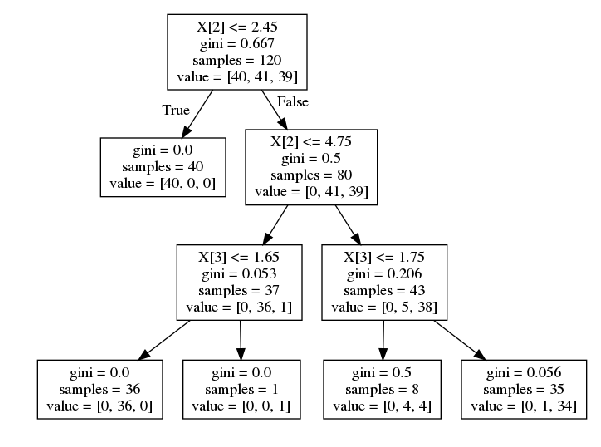

In [6]:
import StringIO
from sklearn import tree
#from graphviz import *

import matplotlib.image as mpimg
import pydotplus

dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(classifier, out_file = dotfile)
dotfile.close()
dot_data = StringIO.StringIO()
tree.export_graphviz(classifier, out_file=dot_data)
graph = pydotplus.graph_from_dot_file("dtree2.dot")
graph.write_png('test.png')
img=mpimg.imread('test.png')
fig = plt.figure(figsize=(10, 10)) 
plt.axis("off")
plt.imshow(img, cmap = plt.cm.binary,
           interpolation="nearest")
plt.show()